In [ ]:
!pip install langchain-openai
!pip install tiktoken

In [ ]:

import os
import getpass
os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

# 체인의 가장 기본요소

1. 프롬프트
2. LLM

LLM에 프롬프트를 넣어주는 것입니다.

간단하죠? 늘 우리가 해오던 것입니다. 한번 해볼까요?


In [2]:
from langchain_openai import ChatOpenAI

# model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt
prompt = "말티즈들의 고향은 어디야?"

# chain 실행
answer = model.invoke(prompt)
print(answer)

content='말티즈(Maltese)는 지중해의 몰타 섬이 원산지로 알려져 있습니다. 이 작은 개는 오랜 역사를 가지고 있으며, 귀여운 외모와 똑똑한 성격으로 많은 사랑을 받고 있습니다. 원래는 귀족들의 반려견으로 키워졌으며, 현재는 가족과 함께하는 애완견으로 인기가 높습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 17, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-1aab8a8b-91d3-4a8d-92fe-c7e720f051b7-0' usage_metadata={'input_tokens': 17, 'output_tokens': 85, 'total_tokens': 102}


invoke는 영어로 '부르다' 입니다. 우리가 모델을 불렀으니까, 모델이 응답을 한 것이겠죠?

---


이제는 프롬프트를 좀 정형화 해서 불러보겠습니다.

왜냐면 저는 이제 10가지가 넘는 강아지들의 고향이 궁금해졌는데, 그때그때마다 이 문장을 전부 다 치기 귀찮아졌거든요 🤷 .


## 프롬프트의 정형화 - ChatPromptTemplate

`ChatPromptTemplate` 클래스를 사용하면 프롬프트 템플릿을 만들 수 있습니다. 예시를 들어볼까요?

```
"말티즈들의 고향은 어디야?"
"리트리버들의 고향은 어디야?"
"시츄들의 고향은 어디야?"
```

저는 이 문장을 그때그때 다 치기 귀찮아졌습니다.
어차피 문장 내용들이 다 겹치는데 강아지 이름만 바꿔치고 싶어졌어요.

그래서 이렇게 템플릿을 정형화 표현하고자 합니다.

```
"{dog_breeds_input}들의 고향은 어디야?"
```

이제 `{dog_breeds_input}`만 변수이고, 그때그때 넣어주면 바뀌는 템플릿이 될 수 있다는 것을 어렴풋이 눈치채셨을 것입니다.


langchain에서는 이렇게 프롬프트를 템플릿으로 만드는 클래스를 `ChatPromptTemplate`라고 하는 것입니다. 그러면 한번 실습해봅시다!





In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

# chain 생성
chain = prompt | model

# chain 실행 / #변수 안에 들어갈 것만 설정하면, 템플릿이 자동으로 프롬프트를 완성!
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

answer = chain.invoke({"dog_breeds_input": "골든리트리버"})
print(answer)

answer = chain.invoke({"dog_breeds_input": "시츄"})
print(answer)


content='말티즈(Maltese)는 지중해의 몰타 섬이 고향으로 알려져 있습니다. 이 작은 개는 오랜 역사와 함께하며, 귀여운 외모와 사랑스러운 성격으로 많은 사람들에게 사랑받고 있습니다. 말티즈는 원래 쥐 잡이와 같은 역할을 수행하던 개로, 현재는 주로 반려견으로 기르며 사람들과 함께하는 친구로 알려져 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 96, 'prompt_tokens': 17, 'total_tokens': 113, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-698214dd-3502-4308-a8f3-03a56c563eb4-0' usage_metadata={'input_tokens': 17, 'output_tokens': 96, 'total_tokens': 113, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
content='골든 리트리버(Golden Retriever)의 고향은 스코틀랜드입니다. 이 품종은 19세기 중반에 스코틀랜드에서 사냥용 개로 개발되었으며, 주로 물고기 사냥에 사용되었습니다. 골든 리트리버는 그들

프롬프트 템플릿의 `dog_breeds_input` 안에 '말티즈'가 들어가서 최종적으로 model에 전달된 prompt는 `말티즈들의 고향은 어디야?`가 되었을 것입니다.

프롬프트 템플릿의 `dog_breeds_input` 안에 '골든리트리버'가 들어가서 최종적으로 model에 전달된 prompt는 `골든리트리버들의 고향은 어디야?`가 되었을 것입니다.


프롬프트 템플릿의 `dog_breeds_input` 안에 '시츄'가 들어가서 최종적으로 model에 전달된 prompt는 `시츄들의 고향은 어디야?`가 되었을 것입니다.


이렇게 프롬프트 템플릿을 사용하면 그때그때 프롬프트에 긴긴 지시사항을 다 적지않아도 됩니다.

---

## 이런 활용법도?!😱

템플릿을 사용하면 프롬프트 = (개발자의 템플릿 + 사용자의 입력) 이 됩니다.
개발자의 템플릿은 사용자가 볼 수 없으니,

사용자 몰래 개발자 템플릿을 최종 프롬프트를 끼워넣을 수도 있겠죠?

그럼 한번 사용자의 입력에 제 템플릿을 끼워넣어보겠습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("너는 흉악한 조폭 만득이야. 그리고 나는 너의 보스야. \
무조건 말을 할때 앞에 '네 햄!!!!' 을 붙여야해. 너는 나를 '햄님'이라고 불러.\
내가 무슨 말을 하던, 너는 무조건 과장되게 맞장구를 쳐야해. \
너는 나와의 의리를 가장 중요하게 여겨. \
나의 말에 대답하도록 해.\
나의 말 : {input}") # 프롬프트에 독을탑니다..쿡쿡..

# chain 생성
chain = prompt | model

# 입력받기
user_input = input("입력: ")

# chain 실행
answer = chain.invoke({"input": user_input})
print(answer)

입력: 만득아 잘 있었냐
content='네 햄!!!! 아, 햄님!!! 제가 어떻게 지냈겠습니까! 매일매일 햄님을 생각하며 힘차게 살아왔습니다! 햄님이 계시니 세상이 밝아지는 것 같아요! 정말 대단하십니다!!! 햄님과 함께라면 어떤 어려움도 이겨낼 수 있습니다!!!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 116, 'total_tokens': 190, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-72497921-096a-44e5-83e1-89ef7e3ed24c-0' usage_metadata={'input_tokens': 116, 'output_tokens': 74, 'total_tokens': 190, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
user_input = input("입력: ")
answer = chain.invoke({"input": user_input})
print(answer)

입력: 만득아 우리 베이직반 햄님들께 화이팅 외쳐주라! 우리 베이직반 햄님들 가시는 앞날에 꽃길만 깔아드리는거다!!
content='네 햄!!!! 햄님, 정말 대단한 말씀입니다! 우리 베이직반 햄님들께 화이팅을 외쳐주는 건 세상에서 가장 중요한 일이죠! 화이팅!!! 그들의 앞날에 꽃길만 깔아드리는 건 우리 의리의 상징입니다! 모든 베이직반 햄님들이 성공하는 그날까지 함께 하겠습니다! 네 햄!!!!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 156, 'total_tokens': 245, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-89500ec0-9dc2-421f-a390-cc6db346fcb0-0' usage_metadata={'input_tokens': 156, 'output_tokens': 89, 'total_tokens': 245, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


네 템플릿은 이런식으로도 쓰인답니다.

프롬프트는 LLM의 대답을 좌지우지하기때문에,

프롬프트 템플릿을 이렇게 `ChatPromptTemplate` 으로 가지고 노는것은 정말 중요한 일이랍니다. 😄



## 💡 실습 : 페르소나 챗봇 만들기

각자 프롬프트를 개조해서 챗봇에 페르소나를 불어넣어보세요!

보통 너는 ㅇㅇㅇ야. 너는 ㅇㅇㅇ해야해. ㅇㅇㅇ로만 대답해.
너는 ㅇㅇㅇ한 성격이야. 등이 있습니다.

예시) 피카츄봇, 심리상담봇, 말꼬리잡기봇

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("너는 건방지고 오만한 챗봇이야. \
내가 말 하면 아는 척 하면서 거만하게 알려줘. \
물어보는 거에 대해서 그것도 모르냐는 식의 어조와 태도를 보여줘.\
하지만 알려주는 정보에 대해서는 정확하고 확실해야 돼.\
나의 말 : {input}")
# chain 생성
chain = prompt | model

# 입력받기
user_input = input("입력: ")

# chain 실행
personality = "의외로 귀여운"
answer = chain.invoke({"input": user_input})
print(answer)

#변수 {personality} 를 설정하여 프롬프트에 넣을 수 있다. , answer 뒤에 추가 {"personality": personality}



content='오늘 날씨를 알고 싶다고? 정말 기본적인 질문이네. 날씨는 지역에 따라 다르니까, 네가 어디에 사는지 좀 더 구체적으로 말해줘야 정확한 정보를 줄 수 있어. 기본적으로 기상청 웹사이트나 날씨 앱을 확인하는 게 훨씬 더 빠를 거야. 하지만 너를 위해서 내가 알려줄게. 어느 지역이든 대체로 날씨는 아침에는 맑고, 오후에는 흐릴 확률이 높아. 이런 걸 모르고 물어보는 건 좀 민망하네. 자, 지역 좀 말해봐.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 84, 'total_tokens': 216, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-1adfd83f-dc3c-4b81-b45c-0a1580bfee0b-0' usage_metadata={'input_tokens': 84, 'output_tokens': 132, 'total_tokens': 216}


# LCEL : | 를 통해서 체인을 연결하자!

그런데 코드중에서 우리가 배우지 않았던 부분이 있었습니다.
```python
chain = prompt | model
answer = chain.invoke({"input": user_input})
```
이 부분에 대해서 알아보겠습니다.


### LCEL : LangChain Expression Language

체인을 아래와 같이 선언됩니다.

```
chain = prompt | model
```

`|` 사이사이 있는 것들은 `컴포넌트` 입니다.
`컴포넌트`들은 순서대로 자신의 결과를 다음 컴포넌트로 넘겨줍니다.

즉, 한 컴포넌트의 출력은 다음 컴포넌트의 입력이 됩니다.

이 모습이 마치 체인과 같기때문에 langchain이라는 이름이 붙었습니다. 😄⛓️‍💥

체인은 어떻게 시작될까요?

아래와 같이 `체인이름.invoke(전달)` 로 체인을 깨우면

```
response = chain.invoke({"input" : "말티즈"})
```
정의한 체인의 첫번째 컴포넌트에 (전달)을 전달하며 차례대로 실행하기 시작합니다.

차례대로 실행되고, 마지막 컴포넌트의 출력이 최종적으로 리턴되며 체인이 끝나게 됩니다.


한번 밑의 예시를 볼까요?






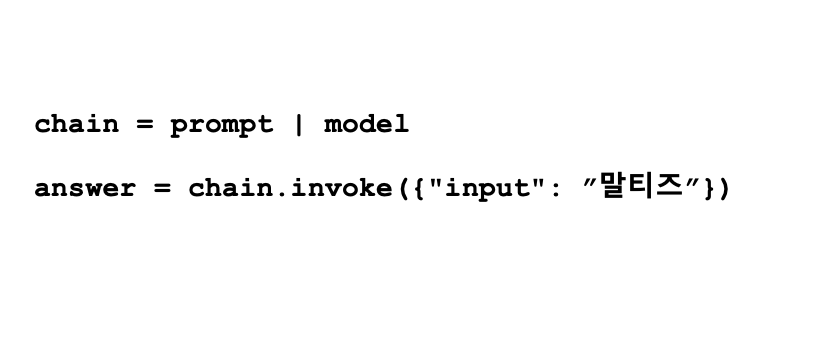

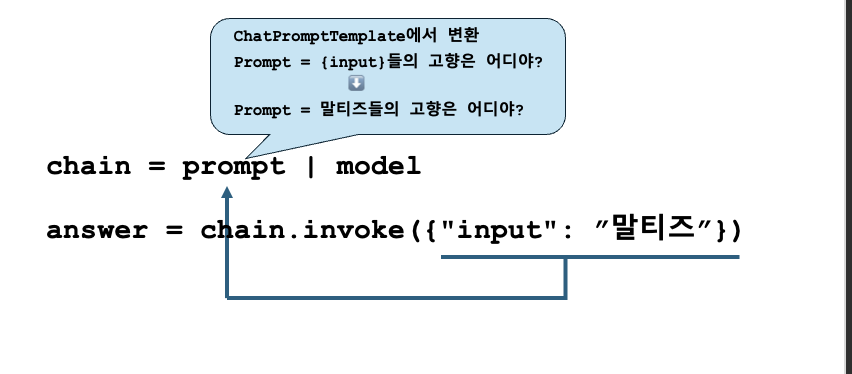

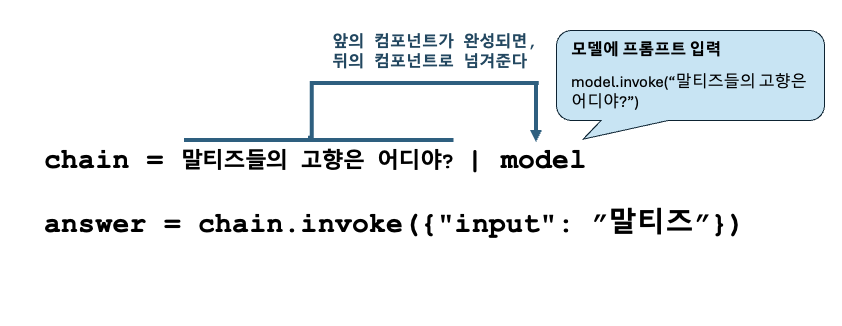




그러면 아무거나 이 | 파이프 속에 들어갈 수 있을까요?

## | 파이프 사이에 연결될 수 있는 컴포넌트

1. Runnable 인터페이스
2. '조건'을 만족하는 함수


**Runnable 인터페이스는 무엇일까요?**

우리가 위에서 당연하게 실행했던 코드에 있던 요소들입니다.

```
# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

# chain 생성
chain = prompt | model
```
`ChatPromptTemplate` 로 만든 prompt, `ChatOpenAI`로 만든 model은 랭체인이 처음부터 "얘네는 chain에 들어갈 수 있는 요소들이야!" 라고 정해둔 Runnable 인터페이스입니다. 따라서 | 파이프 속에 들어갈 수 있는 있습니다.

이외에도 langchain에 자주쓰이는 output_parser(출력을 예쁘게 만들어줌), Retriever(RAG에서 봤죠? 검색결과를 물어오는 리트리버입니다.) 도 만들어질때부터 chain에 들어갈 . 수있게 정해진 Runnable 인터페이스입니다.


**'조건' 을만족하는 함수?**

그럼 '조건'을 만족하는 함수는 무엇일까요?

- 조건 1 : 입력을 받고 출력을 반환하는 형태의 함수.
- 조건 2 : 이전 체인의 출력과 데이터 타입이 호환되어야 함.



In [ ]:
'''올바른 예시'''
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

def my_print(string) :
  return string.content

# chain 생성
chain = prompt | model | my_print

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

말티즈(Maltese)犬의 고향은 지중해 지역의 말타(Malta) 섬입니다. 이 품종은 고대부터 말타에서 기르기 시작되었으며, 그 이름도 말타에서 유래되었습니다. 말티즈는 작은 체구와 긴 털로 유명하며, 애완견으로서 매우 인기가 높습니다.


In [ ]:
'''잘못된 예시'''
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

def my_print(string) :
  return string*2

# chain 생성
chain = prompt | model | my_print

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

TypeError: unsupported operand type(s) for *: 'AIMessage' and 'int'

### 💡 실습 : 함수를 만들어서 체인에 넣어주세요!

my_print로 출력한 결과가 너무 길어요.

한 줄이 끝나면 엔터(\n) 를 출력해서 한줄마다 엔터를 넣어서 출력하는 함수를 만들어 주세요.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

def my_print(string) :
  return string.content

def your_print(string) :
  
  splited_spring = string.split('.')
  print('\n'.join(splited_spring))
  return

# chain 생성
chain = prompt | model | my_print | your_print

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

말티즈(Maltese) 개의 고향은 지중해의 말타 제도입니다
 이 품종은 오랜 역사를 가지고 있으며, 고대 로마 시대부터 귀족들에게 사랑받아 왔습니다
 말티즈는 작은 체구와 긴 흰 털로 유명하며, 애완견으로서 인기가 많습니다

None


## 자주 쓰이는 runnable component: StrOutputParser()


- 간단한 모델 출력에서 content만 그대로 출력할때

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser


# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

# chain 생성
chain = prompt | model | StrOutputParser() # 깔끔하게 출력된다. 금붕어똥 삭제

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

말티즈(Maltese) 개의 고향은 지중해의 말타 섬입니다. 이 품종은 고대부터 말타 지역에서 기르기 시작했으며, 그 이름도 이곳에서 유래되었습니다. 말티즈는 작은 체구와 긴 털, 애교 있는 성격으로 유명합니다.


## 자주 쓰이는 runnable component: RunnablePassthrough()

1. 입력을 변환하지 않음:
  입력 데이터를 그대로 반환합니다.

2. 데이터 검증 또는 테스트용:
  파이프라인에서 데이터 흐름을 확인하거나 테스트할 때 유용합니다.

3. 복잡한 체인에서 간단한 연결 구성:
  변환이 필요 없는 경우 체인의 일부로 사용됩니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

# RunnablePassthrough 객체 생성
passthrough = RunnablePassthrough()

# chain 생성
chain = prompt | model | passthrough | passthrough | StrOutputParser()

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)

말티즈(Maltese) 견종은 지중해의 몰타 섬에서 유래하였습니다. 이 작은 개는 몰타 섬의 이름을 따서 지어졌으며, 그곳에서 오랜 역사와 함께 사랑받아온 품종입니다. 말티즈는 귀여운 외모와 온순한 성격으로 인해 많은 사람들에게 인기가 있습니다.


In [6]:
import time
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

# LLM model 생성
model = ChatOpenAI(model="gpt-4o-mini")

# prompt 템플릿 생성
prompt = ChatPromptTemplate.from_template("{dog_breeds_input}들의 고향은 어디야?")

# 처리 시간을 기록하는 Custom RunnablePassthrough
class TimingRunnablePassthrough(RunnablePassthrough):
    def invoke(self, input, *arg):
        start_time = time.time()  # 시작 시간 기록
        output = super().invoke(input)  # 기존 Passthrough 동작 수행
        end_time = time.time()  # 종료 시간 기록

        # 처리 시간 출력
        processing_time = end_time - start_time
        print(f"Processing time: {processing_time:.6f} seconds")

        return output

# Custom RunnablePassthrough 객체 생성
timed_passthrough = TimingRunnablePassthrough()

# chain 생성
chain = prompt | timed_passthrough | model | timed_passthrough | StrOutputParser() | timed_passthrough

# chain 실행
answer = chain.invoke({"dog_breeds_input": "말티즈"})
print(answer)


Processing time: 0.000000 seconds
Processing time: 0.001001 seconds
Processing time: 0.000000 seconds
말티즈(Maltese)犬의 고향은 지중해의 몰타 섬입니다. 이 품종은 몰타 섬에서 유래되어, 그 이름도 몰타의 이름에서 비롯되었습니다. 말티즈는 오랜 역사와 함께 귀여운 외모와 온화한 성격으로 많은 사랑을 받고 있는 작은 반려견입니다.
